In [1]:
import glob, json, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
import matplotlib.font_manager as font_manager

del font_manager.weight_dict['roman']
font_manager._rebuild()

font = font_manager.FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_weight('light')

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'


# Avoid Type-3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
datasets = {'mnist': 'MNIST', 'kmnist': 'Kuzushiji-MNIST', 'fashion': 'Fashion-MNIST'}
colors = {'sl': 'C0', 'mcl': 'C1', 'sd': 'C3', 'sv': 'C2'}
methods = {'sl': 'CIPS', 'mcl': 'MCL', 'sv': 'SV', 'sd': 'SD'}
markers = {'sl': 'o', 'mcl': 's', 'sv': '^', 'sd': 'D'}

In [4]:
# path to directory where "complexity.csv", "priors.csv", and "tabular.csv" exists.
res_dir = '../stored_results'

# Sample Complexity Evaluation

In [5]:
df = pd.read_csv(os.path.join(res_dir, 'complexity.csv'))

df_mean = 100 - pd.pivot_table(
    df, 
    index=['dataset', 'nsd'],
    columns=['algorithm'],
    values='acc',
    aggfunc=np.mean) * 100

df_se = pd.pivot_table(
    df, 
    index=['dataset', 'nsd'],
    columns=['algorithm'],
    values='acc',
    aggfunc=scipy.stats.sem) * 100

In [6]:
def exp_converter(x):
    tmp = ['{:.0e}'.format(n).split('e+') for n in x]
    labels = []
    for v in x:
        n, p = map(int, '{:.0e}'.format(v).split('e+'))
        labels.append(r'${} \times 10^{}$'.format(n, p))
    return labels

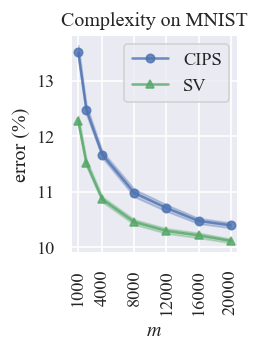

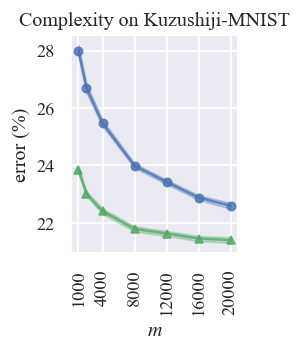

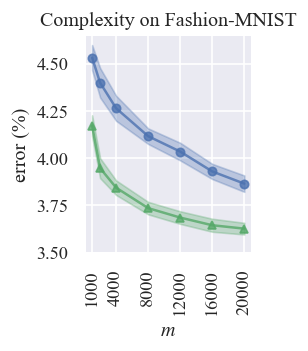

In [7]:
r = 1.2
for dataset in ['mnist', 'kmnist', 'fashion']:
    fig, ax = plt.subplots(dpi=120, figsize=(1.5 * r, 2 * r))
    for alg in ['sl','sv']:
        x = df_mean.loc[dataset][alg].index.values.copy()
        y = df_mean.loc[dataset][alg].copy()
        se = df_se.loc[dataset][alg].copy()
        ax.plot(x, y, marker=markers[alg], markersize=5, label=methods[alg], c=colors[alg], alpha=0.8)
        ax.fill_between(x, y+se, y-se, alpha=0.3, color=colors[alg], edgecolor='none')
        ax.set_xlabel('$m$')
        ax.set_ylabel('error (%)')
        
    x = x[x != 2000]
    ax.set_xticks(x)

    # x[1] = None
    ax.set_xticklabels(x, rotation=90)
    
    if dataset == 'fashion':
        pass
        ax.set_ylim([3.5, 4.65])
    if dataset == 'mnist':
        ax.legend()
    plt.savefig('img/consistency_{}.pdf'.format(dataset), bbox_inches='tight', format='pdf', pad_inches=0.0)
    
    ax.set_title('Complexity on {}'.format(datasets[dataset]))
    plt.savefig('img/consistency_{}.png'.format(dataset), bbox_inches='tight', format='png')

# Evaluation with Various Class Proportions

In [8]:
df = pd.read_csv(os.path.join(res_dir, 'priors.csv'))

df_mean = 100 - pd.pivot_table(
    df, 
    index=['dataset', 'prior'],
    columns=['algorithm'],
    values='acc',
    aggfunc=np.mean) * 100

df_se = pd.pivot_table(
    df, 
    index=['dataset', 'prior'],
    columns=['algorithm'],
    values='acc',
    aggfunc=scipy.stats.sem) * 100

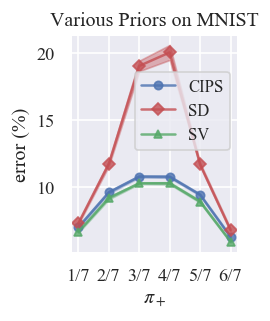

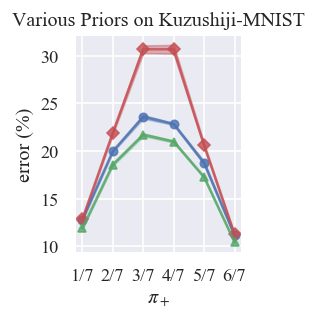

In [9]:
r = 1.2
for dataset in ['mnist', 'kmnist', 'fashion']:
    fig, ax = plt.subplots(dpi=120, figsize=(1.5 * r, 2 * r))
    for alg in ['sl', 'sd', 'sv']:
        y = df_mean.loc[dataset][alg]
        se = df_se.loc[dataset][alg]
        x = df_mean.loc['mnist'][alg].index.values
        ax.plot(x, y, marker=markers[alg], markersize=5, label=methods[alg], c=colors[alg], alpha=0.8)
        ax.fill_between(x, y+se, y-se, alpha=0.4, color=colors[alg], edgecolor='face')
        ax.set_xlabel('$\pi_+$')
        ax.set_ylabel('error (%)')
        
        ax.set_xticks(np.arange(1, 7)/7)
        ax.set_xticklabels(['{}/7'.format(i) for i in range(1, 7)])
    
    if dataset == 'mnist':
        ax.legend(loc='center right', bbox_to_anchor=(1.0, 0.65), fontsize=10)
    plt.savefig('img/prior_{}.pdf'.format(dataset), bbox_inches='tight', format='pdf')
    
    ax.set_title('Various Priors on {}'.format(datasets[dataset]))
    plt.savefig('img/prior_{}.png'.format(dataset), bbox_inches='tight', format='png')

# Classification on Tabular Dataset

In [10]:
df = pd.read_csv(os.path.join(res_dir, 'tabular.csv'))

df_mean = 100 - pd.pivot_table(
    df, 
    index=['dataset', 'nsd'],
    columns=['algorithm'],
    values='acc',
    aggfunc=np.mean) * 100

df_se = pd.pivot_table(
    df, 
    index=['dataset', 'nsd'],
    columns=['algorithm'],
    values='acc',
    aggfunc=scipy.stats.sem) * 100

In [11]:
def float_str(x):
    return '{0:.1f}'.format(np.round(x, 3))

df_tex = df_mean.applymap(float_str) +' ('+ df_se.applymap(float_str) + ')'
df_tex = df_tex[['sl', 'mcl', 'sd', 'ovpc', 'ssp', 'ckm', 'km', 'sv']]
df_tex

algorithm              sl         mcl          sd        ovpc         ssp  \
dataset  nsd                                                                
adult    100   39.8 (1.6)  38.4 (2.1)  30.8 (0.9)  45.0 (0.9)  24.7 (0.3)   
         500   21.5 (1.0)  19.3 (0.4)  23.2 (0.4)  44.7 (0.9)  24.3 (0.3)   
         1000  17.6 (0.3)  17.2 (0.3)  20.5 (0.3)  45.5 (0.7)  24.2 (0.3)   
banana   100   43.6 (0.6)  44.5 (0.6)  45.3 (0.6)  46.0 (0.7)  43.0 (1.0)   
         500   43.1 (0.8)  43.3 (0.6)  45.1 (0.7)  46.0 (0.7)  14.3 (0.7)   
         1000  44.4 (0.6)  44.3 (0.7)  44.4 (0.5)  46.2 (0.5)  11.0 (0.2)   
codrna   100   24.7 (1.8)  32.3 (1.4)  28.0 (1.3)  32.0 (2.0)  45.5 (1.5)   
         500    6.4 (0.2)  10.6 (0.3)  12.0 (0.6)  28.0 (2.1)  48.6 (0.3)   
         1000   6.3 (0.2)   6.5 (0.2)   8.8 (0.4)  28.3 (2.0)  44.8 (1.6)   
ijcnn1   100   16.6 (2.3)  24.9 (2.9)  10.7 (0.3)  41.1 (1.1)  31.6 (2.0)   
         500    7.7 (0.2)   8.2 (0.2)   8.3 (0.2)  41.6 (1.3)  33.0 (2.5)   
         1000   7.7 (0.2)   7.9 (0.2)   8.1 (0.2)  42.0 (1.4)  34.9 (1.7)   
magic    100   24.9 (1.3)  28.7 (1.8)  30.7 (1.3)  41.9 (1.0)  47.1 (0.5)   
         500   21.5 (0.3)  21.3 (0.3)  25.5 (0.8)  39.6 (1.5)  46.8 (0.5)   
         1000  21.3 (0.3)  20.9 (0.3)  23.8 (0.4)  39.5 (1.7)  43.6 (0.9)   
phishing 100   12.7 (2.3)  12.8 (2.3)  34.6 (1.8)  41.7 (1.0)  46.6 (0.5)   
         500    7.2 (0.2)   6.6 (0.1)  26.9 (1.4)  42.9 (0.8)  46.0 (0.5)   
         1000   6.5 (0.2)   6.3 (0.2)  22.0 (1.0)  43.8 (1.1)  45.5 (0.5)   
phoneme  100   28.2 (1.2)  33.1 (1.9)  29.1 (1.2)  38.4 (1.3)  31.0 (1.3)   
         500   25.0 (0.4)  24.2 (0.5)  26.1 (0.6)  38.6 (1.9)  25.5 (0.5)   
         1000  25.2 (0.4)  25.0 (0.4)  26.0 (0.4)  39.8 (1.5)  24.5 (0.5)   
spambase 100   13.8 (1.0)  13.3 (1.3)  31.6 (1.5)  39.7 (1.3)  40.5 (0.4)   
         500    9.4 (0.2)   8.6 (0.2)  22.6 (0.9)  38.0 (1.6)  40.8 (0.3)   
         1000   8.3 (0.2)   7.6 (0.1)  19.7 (0.8)  39.3 (1.2)  40.2 (0.4)   
w8a      100   31.5 (1.9)  31.4 (2.1)  11.8 (0.3)  39.7 (1.4)   5.3 (1.2)   
         500    5.6 (0.7)   4.2 (0.5)   3.2 (0.1)  38.3 (1.3)   3.5 (0.1)   
         1000   2.6 (0.2)   2.2 (0.1)   2.6 (0.2)  43.1 (0.8)   3.0 (0.1)   
waveform 100   18.2 (0.3)  17.7 (0.3)  26.4 (0.9)  41.9 (1.6)  44.1 (0.6)   
         500   15.8 (0.2)  15.1 (0.2)  20.2 (0.5)  38.9 (1.3)  44.9 (0.7)   
         1000  14.9 (0.2)  14.7 (0.2)  18.4 (0.3)  37.0 (1.7)  45.5 (0.5)   

algorithm             ckm          km          sv  
dataset  nsd                                       
adult    100   28.9 (0.8)  24.9 (0.5)  21.9 (0.4)  
         500   28.2 (0.4)  27.5 (0.5)  16.9 (0.3)  
         1000  27.9 (0.4)  27.9 (0.5)  15.9 (0.3)  
banana   100   46.4 (0.7)  45.8 (0.7)  44.6 (0.6)  
         500   45.5 (0.6)  44.4 (0.4)  45.1 (0.6)  
         1000  45.0 (0.7)  44.0 (0.3)  45.1 (0.7)  
codrna   100   46.7 (0.6)  42.5 (1.0)  11.0 (0.6)  
         500   46.2 (0.3)  44.0 (0.7)   6.6 (0.2)  
         1000  46.1 (0.4)  45.4 (0.6)   6.3 (0.2)  
ijcnn1   100   40.0 (1.3)  31.9 (2.4)   9.1 (0.2)  
         500   45.4 (0.8)  41.7 (0.7)   7.9 (0.2)  
         1000  45.9 (0.8)  43.4 (0.7)   7.6 (0.2)  
magic    100   45.5 (1.2)  44.0 (1.2)  21.8 (0.4)  
         500   46.8 (0.4)  44.4 (0.4)  20.8 (0.3)  
         1000  46.8 (0.3)  44.6 (0.4)  20.7 (0.3)  
phishing 100   24.4 (3.4)  47.0 (0.5)   7.6 (0.2)  
         500   16.9 (2.6)  46.4 (0.5)   6.5 (0.2)  
         1000  15.2 (2.7)  46.4 (0.5)   6.3 (0.2)  
phoneme  100   28.0 (1.0)  32.9 (1.2)  25.7 (0.4)  
         500   28.0 (0.8)  32.7 (0.3)  25.0 (0.3)  
         1000  30.2 (0.6)  32.7 (0.3)  25.3 (0.2)  
spambase 100   15.9 (2.0)  39.7 (1.3)  10.5 (0.3)  
         500   11.5 (0.2)  37.4 (2.3)   8.5 (0.2)  
         1000  11.5 (0.2)  39.7 (1.3)   7.8 (0.2)  
w8a      100    6.8 (1.9)   5.5 (1.3)  10.3 (0.4)  
         500   14.0 (3.1)   5.5 (1.1)   2.6 (0.1)  
         1000   8.9 (2.6)   3.7 (0.5)   2.0 (0.1)  
waveform 100   41.0 (1.3)  